**TRAINING/TESTING MODEL**

In [5]:
#libraries required to train the model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm
from tensorflow.keras import layers, models
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [6]:
dataset_dir="./CNN-Dataset"

In [7]:
imgpath=[]
for (dirnames, foldernames, filenames) in os.walk(dataset_dir): #get the full path name of a type of file into all subdirectories with walk
    print(dirnames,foldernames,filenames)
    for filename in filenames:
        if (filename[-3:]=='png'): #using list slicing we can fetch the last 'n' elements from list
            imgpath.append(os.path.join(dirnames, filename)) #os.path.join  combines one or more path names into a single path and then paths will be appended to list imgpath

./CNN-Dataset ['COVID', 'Normal', 'Viral Pneumonia'] []
./CNN-Dataset\COVID [] ['COVID-1.png', 'COVID-10.png', 'COVID-100.png', 'COVID-1000.png', 'COVID-1001.png', 'COVID-1002.png', 'COVID-1003.png', 'COVID-1004.png', 'COVID-1005.png', 'COVID-1006.png', 'COVID-1007.png', 'COVID-1008.png', 'COVID-1009.png', 'COVID-101.png', 'COVID-1010.png', 'COVID-1011.png', 'COVID-1012.png', 'COVID-1013.png', 'COVID-1014.png', 'COVID-1015.png', 'COVID-1016.png', 'COVID-1017.png', 'COVID-1018.png', 'COVID-1019.png', 'COVID-102.png', 'COVID-1020.png', 'COVID-1021.png', 'COVID-1022.png', 'COVID-1023.png', 'COVID-1024.png', 'COVID-1025.png', 'COVID-1026.png', 'COVID-1027.png', 'COVID-1028.png', 'COVID-1029.png', 'COVID-103.png', 'COVID-1030.png', 'COVID-1031.png', 'COVID-1032.png', 'COVID-1033.png', 'COVID-1034.png', 'COVID-1035.png', 'COVID-1036.png', 'COVID-1037.png', 'COVID-1038.png', 'COVID-1039.png', 'COVID-104.png', 'COVID-1040.png', 'COVID-1041.png', 'COVID-1042.png', 'COVID-1043.png', 'COVID-1044.

In [8]:
#initialize the list of image data and target labels
data=[]
target=[]
resize=150

dic={'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19'} #dictionary to map file label name with target label name

In [9]:
for imgpaths in tqdm(imgpath):  #tqdm is used to make terminal progress bar
    label=imgpaths.split(os.path.sep)[-2]
    image=cv2.imread(imgpaths)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image=cv2.resize(image, (resize, resize)) /255 #resizing the image
    

    #updates the respective data and target label lists
    data.append(image)
    target.append(dic[label])

100%|██████████| 9951/9951 [00:34<00:00, 291.61it/s]


In [10]:
print(len(data)) #to know length of data

9951


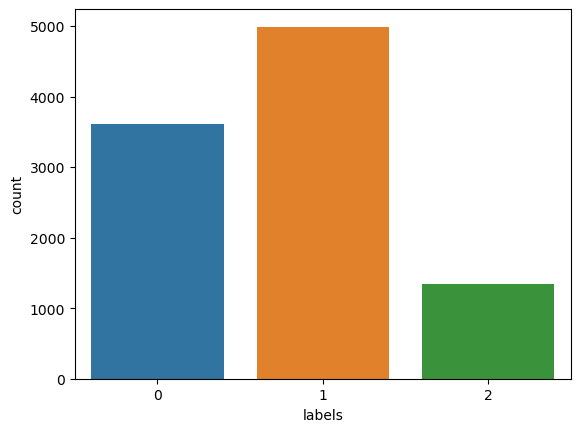

In [12]:
le = LabelEncoder()
target = le.fit_transform(target)
#box plot and counting the lables
df=pd.DataFrame(target,columns=['labels'])
# df = pd.DataFrame(le.inverse_transform(np.argmax(target, axis=1)), columns=['labels'])
# sns.set_style('darkgrid')
# sns.set_palette('bright')
# sns.countplot(df['labels'])
sns.countplot(x='labels', data=df)
plt.show()

In [13]:
size=[]
for file in imgpath: #for loop to get image paths
    img=plt.imread(file) #used to read an image from a file into an array
    size.append(img.shape) #image.shape returns a tuple of the number of rows, columns, and channels (if the image is color).
pd.Series(size).value_counts() #it retures a series containing counts of unique values

(299, 299)       9811
(299, 299, 3)     140
dtype: int64

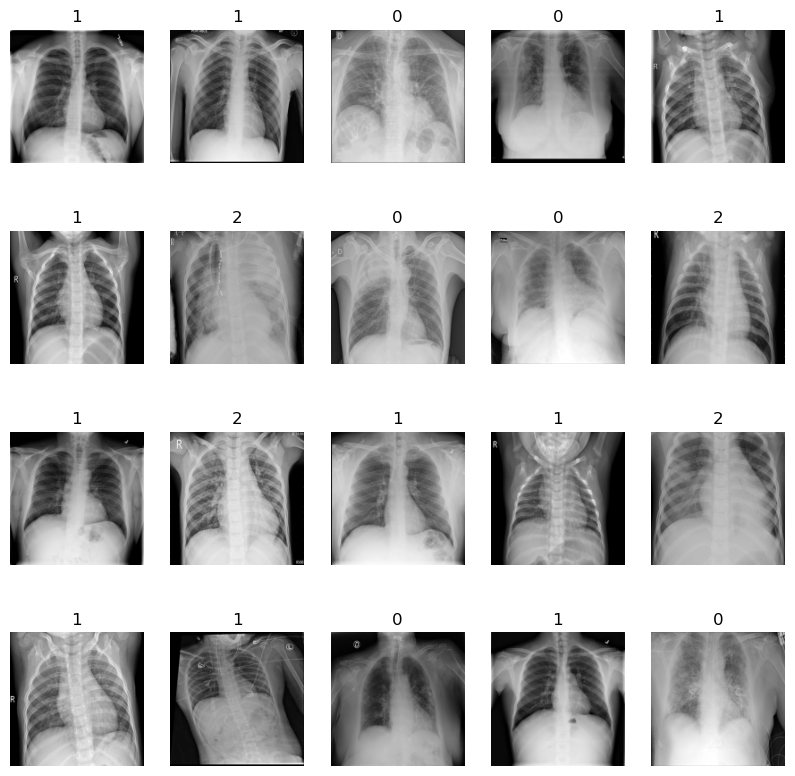

In [14]:
plt.figure(figsize=(10,10)) #to change the size of the images
for c , i in enumerate(list(np.random.randint(0,len(imgpath),20))) : #enumerate() to get a counter and the value from the iterable at the same time and random.randit() to generate randome images from image path
    plt.subplot(4,5,c+1)
    plt.imshow(data[i] , cmap='gray')
    plt.title(target[i])
    plt.axis('off')     
plt.show()

In [15]:
#encode labels as integer
le=LabelEncoder() #labelencoder used to normalize labels
labels=le.fit_transform(target) #also be used to transform non-numerical labels to numerical labels
labels=to_categorical(labels)

print(le.classes_)
print(labels[0])

[0 1 2]
[1. 0. 0.]


In [16]:
#spliting data into training and testing (80-20 Ratio)

(trainX, testX, trainY, testY)=train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

trainX=np.array(trainX)
testX=np.array(testX)
trainY=np.array(trainY)
testY=np.array(testY)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(7960, 150, 150, 3)
(1991, 150, 150, 3)
(7960, 3)
(1991, 3)


In [17]:
trainX[0]

array([[[0.14901961, 0.14901961, 0.14901961],
        [0.16078431, 0.16078431, 0.16078431],
        [0.19215686, 0.19215686, 0.19215686],
        ...,
        [0.4       , 0.4       , 0.4       ],
        [0.38823529, 0.38823529, 0.38823529],
        [0.61960784, 0.61960784, 0.61960784]],

       [[0.25490196, 0.25490196, 0.25490196],
        [0.27843137, 0.27843137, 0.27843137],
        [0.28627451, 0.28627451, 0.28627451],
        ...,
        [0.63137255, 0.63137255, 0.63137255],
        [0.60392157, 0.60392157, 0.60392157],
        [0.67843137, 0.67843137, 0.67843137]],

       [[0.29019608, 0.29019608, 0.29019608],
        [0.34117647, 0.34117647, 0.34117647],
        [0.37254902, 0.37254902, 0.37254902],
        ...,
        [0.43921569, 0.43921569, 0.43921569],
        [0.63529412, 0.63529412, 0.63529412],
        [0.83921569, 0.83921569, 0.83921569]],

       ...,

       [[0.79607843, 0.79607843, 0.79607843],
        [0.8       , 0.8       , 0.8       ],
        [0.78823529, 0

In [18]:
from tensorflow.keras import backend as K
K.clear_session()

In [19]:
#CNN Model
s=150
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(s,s,3), kernel_initializer='he_normal'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))

model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

In [20]:
#compile
model.compile(optimizer=Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 33, 33, 128)      0

In [22]:
data=[]

In [23]:
imgpath=[]

In [24]:
df=[]

In [25]:
size=[]

In [26]:
#will train model upto 20 epochs
epochs=20
batch_size=64

ThisModel=model.fit(trainX, trainY, batch_size, steps_per_epoch=len(trainX) // batch_size, validation_data=(testX, testY), validation_steps=len(testX) // batch_size, epochs=epochs, verbose=1)

Epoch 1/20
124/124 [==============================] - 97s 737ms/step - loss: 0.7120 - accuracy: 0.7346 - val_loss: 0.3325 - val_accuracy: 0.8735
Epoch 2/20
124/124 [==============================] - 90s 733ms/step - loss: 0.3267 - accuracy: 0.8728 - val_loss: 0.3439 - val_accuracy: 0.8856
Epoch 3/20
124/124 [==============================] - 92s 740ms/step - loss: 0.2592 - accuracy: 0.9003 - val_loss: 0.2189 - val_accuracy: 0.9183
Epoch 4/20
124/124 [==============================] - 106s 857ms/step - loss: 0.2100 - accuracy: 0.9189 - val_loss: 0.2246 - val_accuracy: 0.9264
Epoch 5/20
124/124 [==============================] - 93s 750ms/step - loss: 0.1719 - accuracy: 0.9391 - val_loss: 0.2014 - val_accuracy: 0.9229
Epoch 6/20
124/124 [==============================] - 98s 793ms/step - loss: 0.1293 - accuracy: 0.9549 - val_loss: 0.2079 - val_accuracy: 0.9320
Epoch 7/20
124/124 [==============================] - 105s 845ms/step - loss: 0.1241 - accuracy: 0.9571 - val_loss: 0.1966 - val_

In [28]:
model.save('./CNN-Dataset/CNN_Model.h5')

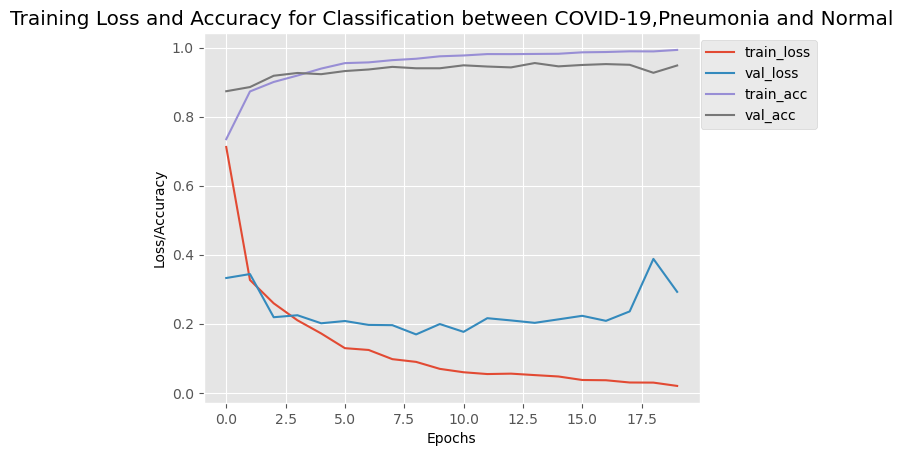

In [29]:
#loss/accuracy graph
n=epochs
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, n), ThisModel.history["loss"], label="train_loss")
plt.plot(np.arange(0, n), ThisModel.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n), ThisModel.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n), ThisModel.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy for Classification between COVID-19,Pneumonia and Normal")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.savefig("plot.png")

In [30]:
#to check test accuacy
modelLoss, modelAccuracy=model.evaluate(testX, testY, verbose=0)

print('Test Loss is: {}'.format(modelLoss))
print('Test Accuracy is: {}'.format(modelAccuracy ))

Test Loss is: 0.2924844026565552
Test Accuracy is: 0.9477649331092834


In [31]:
modelLoss=[]

In [32]:
modelAccuracy=[]

In [38]:
#classification report on train
predIdxs = model.predict (trainX, batch_size=64)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_.astype(str).tolist(), digits=3))

125/125 [==============================] - 13s 105ms/step
              precision    recall  f1-score   support

           0      0.995     1.000     0.997      2892
           1      0.999     0.997     0.998      3992
           2      1.000     0.994     0.997      1076

    accuracy                          0.998      7960
   macro avg      0.998     0.997     0.997      7960
weighted avg      0.998     0.998     0.998      7960



In [39]:
predIdxs=[]

In [41]:
#classification report on test
predIdxs=model.predict(testX, batch_size=64)
predIdxs=np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_.astype(str).tolist(), digits=3))

32/32 [==============================] - 4s 108ms/step
              precision    recall  f1-score   support

           0      0.928     0.967     0.947       724
           1      0.959     0.947     0.953       998
           2      0.960     0.900     0.929       269

    accuracy                          0.948      1991
   macro avg      0.949     0.938     0.943      1991
weighted avg      0.948     0.948     0.948      1991



In [42]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusionmatrix=confusion_matrix(testY.argmax(axis=1), predIdxs)
print(confusionmatrix)

[[700  20   4]
 [ 47 945   6]
 [  7  20 242]]


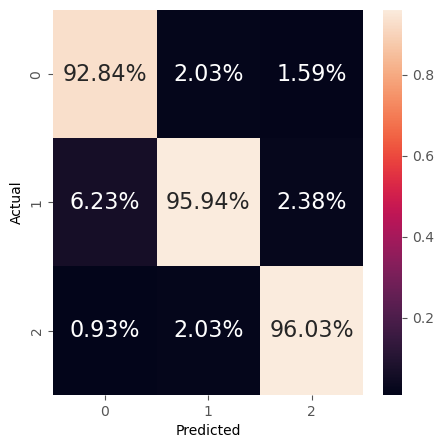

In [43]:
#heatmap
df_cm=pd.DataFrame(confusionmatrix, columns=le.classes_, index=le.classes_)
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(5,5))
sns.heatmap(df_cm/np.sum(df_cm), fmt='.2%', annot=True, annot_kws={'size':16})
plt.show()

**PREDICTING THE OUTPUT**

In [44]:
#loading the model
from tensorflow import keras
model=keras.models.load_model('./CNN-Dataset/CNN_Model.h5')

In [45]:
#necessary libraries
from numpy import asarray
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [47]:
#image paths
covid_img_path="./CNN-Dataset/COVID/COVID-19.png"
normal_img_path="./CNN-Dataset/Normal/Normal-500.png"
pneumonia_img_path="./CNN-Dataset/Viral Pneumonia/Viral Pneumonia-1000.png"

img_paths=[covid_img_path, normal_img_path, pneumonia_img_path]

In [48]:
print(img_paths)

['./CNN-Dataset/COVID/COVID-19.png', './CNN-Dataset/Normal/Normal-500.png', './CNN-Dataset/Viral Pneumonia/Viral Pneumonia-1000.png']


In [56]:
#preprocessing the image
resize=150

images=[]

for img_path in img_paths:
  img_path=cv2.imread(img_path)
  img_path=cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB) 
  img_path=cv2.resize(img_path, (resize, resize)) /255
  images.append(img_path)

In [57]:
#printing image shape
count=0
for _ in images:
  images[count]=np.array(images[count])
  images[count]=np.expand_dims(images[count], axis=0)
  print(images[count].shape)
  count+=1

(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)


In [58]:
#prediction
prediction=[]
for i in images:
  prediction.append(model.predict(i))

1/1 [==============================] - 0s 24ms/step


In [59]:
#output of prediction
output=[]
for p in prediction:
  output.append(np.argmax(p,axis=1))

In [60]:
#0: COVID-19
#1: Normal
#2: Pneumonia

title=[]

for out in output:
  if out==0:
    title.append('COVID-19')
  elif out==1:
    title.append('Normal')
  else:
    title.append('Pneumonia')

print(title)

['COVID-19', 'Normal', 'Pneumonia']


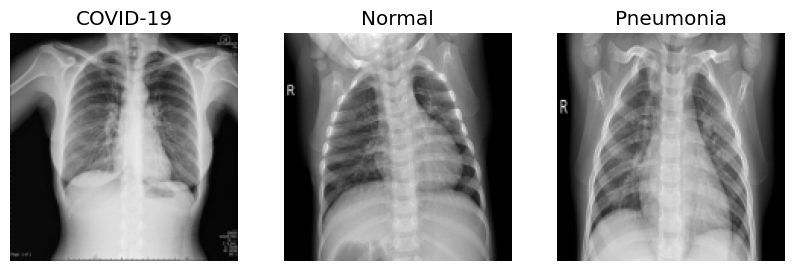

In [61]:
#printing the images with predicted output
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

i=0

for img in images:
  plt.subplot(1,3,i+1)
  plt.imshow(np.squeeze(img) , cmap='gray')
  plt.title(title[i])
  plt.axis('off')  
  i+=1   
plt.show()